# Clasificador - hito 2

In [95]:
import pandas as pd
import numpy as np
import pickle
from string import punctuation
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})
import plotly
import plotly.express as px

file_names = {
    "df_es_mapping": "../../Data/mapping/df_es_mapping.pickle",
    "df_us_mapping": "../../Data/mapping/df_us_mapping.pickle",
    
    "df_es_test": "../../Data/test/df_es_test.pickle",
    "df_us_test": "../../Data/test/df_us_test.pickle",
    
    "df_es_train": "../../Data/train/df_es_train.pickle",
    "df_us_train": "../../Data/train/df_us_train.pickle",
    
    "df_es_trial": "../../Data/trial/df_es_trial.pickle",
    "df_us_trial": "../../Data/trial/df_us_trial.pickle",
}

# mas imports

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer # tokenizer especial para tweets
tt = TweetTokenizer()
# nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

import plotly as ply
import plotly.graph_objects as go
import numpy as np

**cargar sets**

In [96]:
df_es_train = pickle.load(open(file_names["df_es_train"], "rb"))
df_es_trial = pickle.load(open(file_names["df_es_trial"], "rb"))
df_es_test = pickle.load(open(file_names["df_es_test"], "rb"))

df_us_train = pickle.load(open(file_names["df_us_train"], "rb"))
df_us_trial = pickle.load(open(file_names["df_us_trial"], "rb"))
df_us_test = pickle.load(open(file_names["df_us_test"], "rb"))

**pre-procesamiento**

In [97]:
df_us_train['tokenized_text'] = df_us_train['text'].str.lower().apply(lambda x: " ".join(tt.tokenize(x)))
df_us_train.head()

id                                               text  \
0  729044324441186304         Selfies for summatime @ Drexel University    
1  663834134037442560  Ready to be a bulldog with rasso #hailstate #i...   
2  747449193350963200  #scored my new #matcotools #slidehammer weight...   
3  691439672761925637  @user last night was so much fun @ Skyway Thea...   
4  758118895618109440                 love beach days @ Manasquan Beach    

  label                                     tokenized_text  
0    12          selfies for summatime @ drexel university  
1    14  ready to be a bulldog with rasso #hailstate #i...  
2    16  #scored my new #matcotools #slidehammer weight...  
3     6  @user last night was so much fun @ skyway theatre  
4    12                  love beach days @ manasquan beach

In [98]:
df_us_test['tokenized_text'] = df_us_test['text'].str.lower().apply(lambda x: " ".join(tt.tokenize(x)))

In [99]:
"""stopwords_en_withpunct = set(stopwords_en).union(set(punctuation))
print(list(stopwords_en_withpunct)[:10])""";

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
vectorizer = CountVectorizer(min_df=5)
X_train_bow = vectorizer.fit_transform(df_us_train["tokenized_text"])
X_test_bow = vectorizer.transform(df_us_test["tokenized_text"])

In [102]:
from sklearn.naive_bayes import MultinomialNB

In [103]:
clf = MultinomialNB()
clf.fit(X_train_bow, df_us_train["label"])

MultinomialNB()

In [104]:
clf.score(X_train_bow, df_us_train["label"])

0.39701310639001064

In [105]:
from sklearn.metrics import classification_report

In [106]:
df_us_mapping = pickle.load(open(file_names["df_us_mapping"], "rb")).sort_values("label")
df_us_mapping

label emoji                              name
0      0     ❤                       _red_heart_
1      1     😍     _smiling_face_with_hearteyes_
10    10     📷                          _camera_
11    11    🇺🇸                   _United_States_
12    12     ☀                             _sun_
13    13     💜                    _purple_heart_
14    14     😉                    _winking_face_
15    15     💯                  _hundred_points_
16    16     😁  _beaming_face_with_smiling_eyes_
17    17     🎄                  _Christmas_tree_
18    18     📸               _camera_with_flash_
19    19     😜        _winking_face_with_tongue_
2      2     😂          _face_with_tears_of_joy_
3      3     💕                      _two_hearts_
4      4     🔥                            _fire_
5      5     😊  _smiling_face_with_smiling_eyes_
6      6     😎    _smiling_face_with_sunglasses_
7      7     ✨                        _sparkles_
8      8     💙                      _blue_heart_
9      9     😘             _face_blowing_a_kiss_

In [107]:
y_pred = clf.predict(X_test_bow)
print(classification_report(df_us_test["label"], y_pred, target_names=df_us_mapping["emoji"]))

              precision    recall  f1-score   support

           ❤       0.35      0.58      0.44     10798
           😍       0.25      0.25      0.25      4830
           📷       0.16      0.16      0.16      1432
          🇺🇸       0.47      0.50      0.48      1949
           ☀       0.25      0.43      0.32      1265
           💜       0.32      0.05      0.08      1114
           😉       0.12      0.04      0.06      1306
           💯       0.27      0.14      0.19      1244
           😁       0.14      0.03      0.05      1153
           🎄       0.60      0.60      0.60      1545
           📸       0.29      0.10      0.15      2417
           😜       0.04      0.01      0.01      1010
           😂       0.30      0.52      0.38      4534
           💕       0.19      0.05      0.08      2605
           🔥       0.45      0.47      0.46      3716
           😊       0.09      0.06      0.07      1613
           😎       0.16      0.11      0.13      1996
           ✨       0.29    

In [108]:
vocab = {k: v for v, k in enumerate(vectorizer.get_feature_names_out())}

In [109]:
# para pasar de palabra a pbb

vec_test = np.zeros(X_train_bow.shape[1])
k = vocab["santa"]
vec_test[k] = 1
print(vectorizer.inverse_transform([vec_test])[0][0])
clf.predict_proba([vec_test])

santa


array([[0.21267139, 0.10559105, 0.03170409, 0.02263593, 0.06533366,
        0.01011697, 0.02992065, 0.00932074, 0.02055197, 0.11856118,
        0.02276163, 0.02159743, 0.10988494, 0.03433423, 0.01711626,
        0.03922043, 0.05487754, 0.02576475, 0.02707579, 0.02095938]])

In [110]:
from sklearn.metrics import f1_score, accuracy_score



dfs = [1,2,3,4,5]
alphas = [0, 0.2, 0.4, 0.6, 0.8, 1]

f1_m = {}
f1_w = {}
scores={}



for j in range(len(alphas)):

    f1_m[j] = {}   
    f1_w[j] = {}
    scores[j] = {}
    for i in range(len(dfs)):
        
        #Vectorización 
        vectorizer = CountVectorizer(min_df=dfs[i]) #Definimos la cantidad de veces que se repite una palabra para que el clasificador la tome en consideración.
        X_train_bow = vectorizer.fit_transform(df_us_train["tokenized_text"])
        X_test_bow = vectorizer.transform(df_us_test["tokenized_text"])

        #Obtenemos el clf score para el clasificador
        clf = MultinomialNB(alpha=alphas[j])
        clf.fit(X_train_bow, df_us_train["label"])
        clf.score(X_train_bow, df_us_train["label"])


        #
        y_pred = clf.predict(X_test_bow)
        y_true = df_us_test["label"]
        
        # Se llenan los diccionarios
        f1_m[j][i] = f1_score(y_true, y_pred, average="macro")
        f1_w[j][i] = f1_score(y_true, y_pred, average="weighted")   
        scores[j][i] = accuracy_score(y_true, y_pred)

c:\Users\Gianluca Musso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Gianluca Musso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Gianluca Musso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Gianluca Musso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Gianluca Musso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in nu

In [111]:
print(f1_m)
print("###############################")
print(f1_w)
print("###############################")
print(scores)

#hacer un heat map  (seaborn o matplotlib)

{0: {0: 0.19863754410857268, 1: 0.20355921152141065, 2: 0.20608356916619827, 3: 0.2082716776455104, 4: 0.21031071598312612}, 1: {0: 0.20092393889697985, 1: 0.2246604950607606, 2: 0.22670620858911333, 3: 0.22592395021038397, 4: 0.2256364023087852}, 2: {0: 0.17310052965475015, 1: 0.21679107978687767, 2: 0.2246805784752754, 3: 0.22515845389413766, 4: 0.22667944045943167}, 3: {0: 0.14801942948018462, 1: 0.20832622427719039, 2: 0.21811451670535717, 3: 0.22233420950181904, 4: 0.22514454860870575}, 4: {0: 0.1306472750281599, 1: 0.1980333517393656, 2: 0.21228598031885557, 3: 0.21753294549922408, 4: 0.22183609576923544}, 5: {0: 0.11923094309447431, 1: 0.1880897880221019, 2: 0.20533512215277555, 3: 0.21212549759200358, 4: 0.21621288778902498}}
###############################
{0: {0: 0.2552358509890882, 1: 0.2613420909284648, 2: 0.2650097485653314, 3: 0.26735604905085564, 4: 0.26972014747230527}, 1: {0: 0.27030246405690456, 1: 0.28627239480857014, 2: 0.28725154346994003, 3: 0.28622525023615597, 4

In [112]:
import seaborn as sns; sns.set_theme()
scores_array = []
for i in scores:

    data = np.array(list(scores[i].values()) ).reshape(5,) # transform to 2D
    data = data.transpose() # transpose (swap rows with columns)
    data = np.flipud(data)  # flip vertically to match chessboard layout
    scores_array.append(data)

scores_array


[array([0.28132, 0.27814, 0.27492, 0.26998, 0.26144]),
 array([0.30354, 0.30434, 0.30642, 0.30864, 0.31368]),
 array([0.311  , 0.3121 , 0.31524, 0.31628, 0.31118]),
 array([0.3165 , 0.31676, 0.31804, 0.32036, 0.30196]),
 array([0.3188 , 0.31918, 0.32066, 0.32022, 0.29424]),
 array([0.31942, 0.32014, 0.32146, 0.31822, 0.28842])]

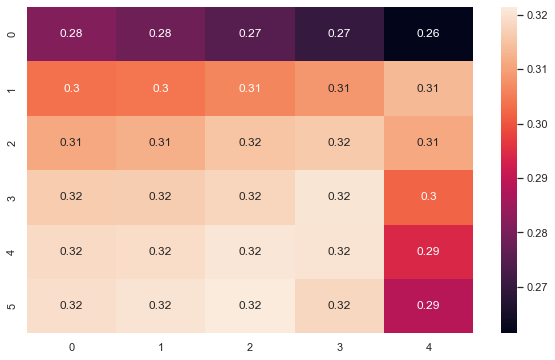

In [113]:
import seaborn as sns; sns.set_theme()

ax = sns.heatmap(scores_array, annot=True)

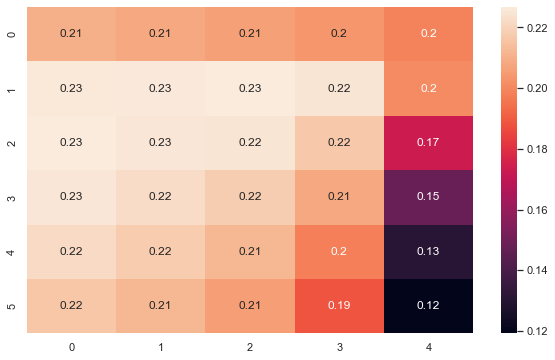

In [114]:
f1_m_array = []

for i in f1_m:

    data = np.array(list(f1_m[i].values()) ).reshape(5,) # transform to 2D
    data = data.transpose() # transpose (swap rows with columns)
    data = np.flipud(data)  # flip vertically to match chessboard layout
    f1_m_array.append(data)

f1_m_array

ax = sns.heatmap(f1_m_array, annot=True)

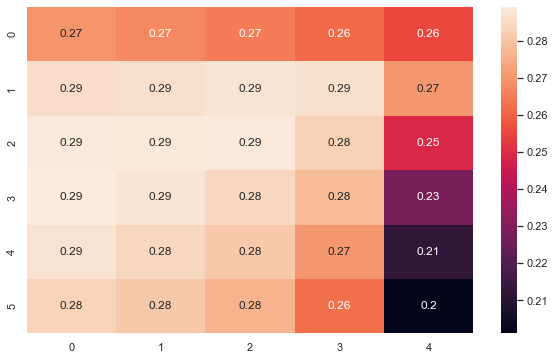

In [115]:
f1_w_array = []

for i in f1_w:

    data = np.array(list(f1_w[i].values()) ).reshape(5,) # transform to 2D
    data = data.transpose() # transpose (swap rows with columns)
    data = np.flipud(data)  # flip vertically to match chessboard layout
    f1_w_array.append(data)

f1_w_array

ax = sns.heatmap(f1_w_array, annot=True)

### Top palabras por emoji

In [116]:
%%time
vocab_length = X_train_bow.shape[1]
proba_matrix = np.array([clf.predict_proba(np.eye(1,vocab_length,k))[0] for k in range(vocab_length)])

CPU times: total: 688 ms
Wall time: 4.92 s


In [117]:
print(vocab_length)
print(proba_matrix.shape)

29983
(29983, 20)


In [118]:
una_linea = proba_matrix[:,3]
una_linea.shape

(29983,)

In [119]:
def topPalabras(proba_matrix,emoji_id,k=5):
    # retorna las palabras para las cuales el emoji en cuestión tiene mas probabilidad
    prob = proba_matrix[:,emoji_id]  # mmm
    ind = np.argpartition(prob,-k)[-k:]
    val = prob[ind]
    palabras = [vectorizer.inverse_transform([np.eye(1,vocab_length,k)[0]])[0][0] for k in ind]
    return palabras, val

In [120]:
i = 9
map_emojis = df_us_mapping["label"].values
print(df_us_mapping["emoji"][int(map_emojis[i])])
topPalabras(proba_matrix,i)

🎄


(['tree', 'tis', 'christmas2015', 'merry', 'christmastree'],
 array([0.58739394, 0.62045562, 0.59251379, 0.59215716, 0.78961278]))

In [121]:
for i in range(20):
    print(df_us_mapping["emoji"][int(map_emojis[i])])
    pal, val = topPalabras(proba_matrix,i)
    print(dict([(pal[j],val[j]) for j in range(len(pal))]))

❤
{'heart': 0.5761150508287713, 'valentines': 0.5811796285055364, 'lovemyfamily': 0.5793072574283205, 'valentine': 0.5949253260518093, 'loveofmylife': 0.6651429760457039}
😍
{'inlove': 0.4288496011644503, 'gorg': 0.4453369489332203, 'obsessed': 0.44883209548006375, 'swoon': 0.45600734120528374, 'swooning': 0.4562752924146042}
📷
{'sony': 0.3882939691961041, 'gdlfashion': 0.4052054276523981, 'bvillain': 0.5117380913776236, 'shredforaliving': 0.42318456197855087, 'kae': 0.4156412082407767}
🇺🇸
{'murica': 0.7800742137338681, 'imwithher': 0.8062308003990193, 'election2016': 0.8313563588022287, 'ivoted': 0.8638840691974496, 'merica': 0.8821097001791353}
☀
{'soakin': 0.447527739339606, 'sun': 0.45989390878761877, 'sunny': 0.4740267973356278, 'sunshine': 0.5826999203405687, 'beachin': 0.4927352286841576}
💜
{'snyder': 0.3559341490500346, 'ripprince': 0.3575182172656461, 'endalz': 0.4398786494003444, 'purple': 0.5506017875276537, 'purplerain': 0.5134869871082338}
😉
{'backtowork': 0.212917247503517

### Visualización de tokens según Naive Bayes

Esta seccion consiste en una visualizacion de los tokens segun la codificacion que nos entrega Naive Bayes. De la seccion anterior, se pueden obtener las probabilidad de que un token pertenezca a una clase dada. En nuestro caso, a un emoji dado. Esto es:

$$P(w \in C) = \frac{\text{#(tweets donde $w$ es uno de sus tokens y el tweet tiene el emoji $C$)}}{\text{#(tweets con el token $w$)}}$$

De esta manera, cada token posee un vector de probabilidades. Donde la $C-$esima componente corresponde a $P(w \in C)$. Es decir, 

$$\vec{w} = (P(w \in C) : \text{$C$ es un emoji})$$

En particular, cada vector $\vec{w}$ es uno con tantas coordenadas como emojis (20 en Ingles). Y cada coordenada esta entre 0 y 1. Es decir, cada $\vec{w} \in [0, 1]^{\text{#Emojis}}$.

Ahora bien, es de nuestro interes visualizar cada token segun su vector de probabilidad. Sin embargo, es necesario reducir la dimensionalidad de cada vector a una facil de interpretar (en nuestro caso 2-dimensiones). Para esto, se utiliza un metodo de reduccion de dimensionalidad denominado UMAP y ampliamente utilizado para la visualizacion de datos en altas dimensiones.

In [122]:
!pip install umap-learn
import umap

You should consider upgrading via the 'C:\Users\Gianluca Musso\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
c:\Users\Gianluca Musso\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [123]:
reducer = umap.UMAP()
to_R2 = reducer.fit_transform(proba_matrix)
to_R2.shape

(29983, 2)

Luego de reducir los vectores de probabilidad a uno de bi-dimensional, visualizaremos segun dos aspectos el espacio de tokens. Primero, se colorean los vectores segun el emoji con mayor probabilidad. Por ejemplo, si el token $happy$ tiene mayor probabilidad de estar en la clase $smile$, entonces se asocia este token con dicho emoji. La razon de esto es solo para simplificar el analisis. Segundo, existen tokens con probabilidades maximas mas grandes que otras, es decir, tokens asociados a un mismo emoji (segun el criterio anterior) que poseen probabilidades distintas de pertenecer a dicha clase. Para observar esto, se visualizan los token con puntos de diferente tamaño y proporcional a tal probabilidad. 

In [124]:
df_umap = pd.DataFrame(to_R2)
df_umap["token"] = vectorizer.get_feature_names_out()
df_umap["label"] = np.argmax(proba_matrix, axis=1).astype(str)
df_umap["proba"] = np.max(proba_matrix, axis=1)
df_umap = df_umap.merge(df_us_mapping, on="label", how="left")
df_umap

0         1 token label     proba emoji  \
0      2.193654 -1.333330    00     0  0.160577     ❤   
1      3.990439 -1.200081   000     0  0.144546     ❤   
2     -1.606774  4.274028   001     2  0.119453     😂   
3      0.150096  1.375142   004    10  0.116191     📷   
4     -0.990429  2.848140   005     2  0.114231     😂   
...         ...       ...   ...   ...       ...   ...   
29978  1.050745  2.515145    σχ     7  0.116272     ✨   
29979  0.340859 -2.869867  アメリカ     0  0.187796     ❤   
29980  1.335150 -5.146630    留学     0  0.288069     ❤   
29981 -0.773990 -1.509053    뉴욕     0  0.131694     ❤   
29982  0.108393  1.034918   토론토    19  0.116800     😜   

                             name  
0                     _red_heart_  
1                     _red_heart_  
2        _face_with_tears_of_joy_  
3                        _camera_  
4        _face_with_tears_of_joy_  
...                           ...  
29978                  _sparkles_  
29979                 _red_heart_  
29980                 _red_heart_  
29981                 _red_heart_  
29982  _winking_face_with_tongue_  

[29983 rows x 7 columns]

In [125]:
data = []
for label in df_us_mapping["label"]:
    sub_df = df_umap[df_umap["label"] == label]
    data.append(
        go.Scattergl(
            x = sub_df[0],
            y = sub_df[1],
            mode='markers',
            text=sub_df["token"]+"<br>"+sub_df["emoji"]+"<br>"+sub_df["proba"].apply(lambda x: str(np.round(x, 3))),
            name=sub_df["emoji"].iloc[0],
            marker=dict(
                size=25*sub_df["proba"],
                line_width=0.2,
            )
        )
    )
    
fig = go.Figure(data=data)
fig.update_layout(
    title="Proyección (UMAP) de vectores de probabilidad de tokens",
    autosize=False,
    width=700,
    height=500,
)
fig.show(renderer="notebook")

**Comentarios** El top 5 de la seccion anterior se puede capturar con los primero cinco punto de mayor tamaño para un emoji dado. Tambien, se observa que la clase con mas puntos corresponde al emoji del corazon. Mismo emoji con mayor popularidad visto en la etapa de analisis de los datos. Se observan grupos diferenciados, pero que logran solaparse. Esta zona coincide con aquellos tokens con probabilidades uniformes de pertenecer a cada clase y/o con probabilidad maxima cercanas a 0.1.